# Homework 1, Problem 2: Series

In [1]:
def exp(x, n):
    sum = 1
    term = 1
    for i in range(1, n+1):
        term = term*x/i
        sum += term
    return sum

In [2]:
def exp_adjusted(x, n):
    if x < 0:
        return 1 / exp(-1*x, n)
    return exp(x, n)


In [9]:
import numpy as np
x = list(range(0, 101))

exp20numpy = np.exp(20)
expnn20numpy = np.exp(-20)
expx = {
    "exp(20) original": [exp(20, n) for n in x],
    "exp(-20) original": [exp(-20, n) for n in x],
    "exp(-20) adjusted": [exp_adjusted(-20, n) for n in x]
}

def err(numpy, series):
    return abs(numpy - series) / numpy
def err_list(numpy, series_list):
    return [err(numpy, series) for series in series_list]

y = {
    "exp(20) original": err_list(exp20numpy, expx["exp(20) original"]),
    "exp(-20) original": err_list(expnn20numpy, expx["exp(-20) original"]),
    "exp(-20) adjusted": err_list(expnn20numpy, expx["exp(-20) adjusted"])
}

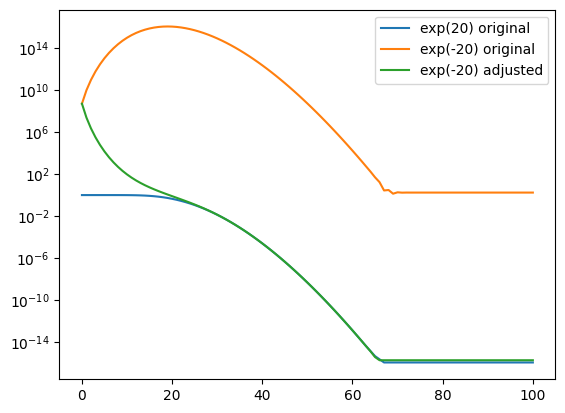

In [10]:
import matplotlib.pyplot as plt

for label, ys in y.items():
    plt.plot(x, ys, label=label)

plt.legend()
plt.yscale("log")
plt.show()